In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
loan_df = pd.read_csv('dataset/new_lending_club_loans.csv')

In [3]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  \
0  1077501    1296599     5000.0       5000.0           4975.0       162.87   
1  1077430    1314167     2500.0       2500.0           2500.0        59.83   
2  1077175    1313524     2400.0       2400.0           2400.0        84.33   
3  1076863    1277178    10000.0      10000.0          10000.0       339.31   
4  1075358    1311748     3000.0       3000.0           3000.0        67.79   

  grade sub_grade                 emp_title home_ownership  ...  \
0     B        B2                     Other           RENT  ...   
1     C        C4                     Ryder           RENT  ...   
2     C        C5                     Other           RENT  ...   
3     C        C1       AIR RESOURCES BOARD           RENT  ...   
4     B        B5  University Medical Group           RENT  ...   

   application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0        INDIVIDUAL            0.0                      0.0         0.0   
1        INDIVIDUAL            0.0                      0.0         0.0   
2        INDIVIDUAL            0.0                      0.0         0.0   
3        INDIVIDUAL            0.0                      0.0         0.0   
4        INDIVIDUAL            0.0                      0.0         0.0   

  pub_rec_bankruptcies tax_liens term_months int_rate_% emp_length_year  \
0                  0.0       0.0          36      10.65              10   
1                  0.0       0.0          60      15.27               0   
2                  0.0       0.0          36      15.96              10   
3                  0.0       0.0          36      13.49              10   
4                  0.0       0.0          60      12.69               1   

  revol_util_%  
0         83.7  
1          9.4  
2         98.5  
3         21.0  
4         53.9  

[5 rows x 58 columns]

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42420 entries, 0 to 42419
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42420 non-null  int64  
 1   member_id                   42420 non-null  int64  
 2   loan_amnt                   42420 non-null  float64
 3   funded_amnt                 42420 non-null  float64
 4   funded_amnt_inv             42420 non-null  float64
 5   installment                 42420 non-null  float64
 6   grade                       42420 non-null  object 
 7   sub_grade                   42420 non-null  object 
 8   emp_title                   42420 non-null  object 
 9   home_ownership              42420 non-null  object 
 10  annual_inc                  42420 non-null  float64
 11  verification_status         42420 non-null  object 
 12  issue_d                     42420 non-null  object 
 13  loan_status                 424

In [5]:
loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  4.242000e+04  4.242000e+04  42420.000000  42420.000000   
mean   6.650476e+05  8.262932e+05  11100.622348  10831.808699   
std    2.188512e+05  2.789670e+05   7409.234126   7144.781810   
min    5.473400e+04  7.069400e+04    500.000000    500.000000   
25%    4.987715e+05  6.391245e+05   5200.000000   5075.000000   
50%    6.445045e+05  8.244245e+05   9775.000000   9600.000000   
75%    8.259598e+05  1.034200e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     42420.000000  42420.000000  4.242000e+04  42420.000000   
mean      10152.617744    322.899562  6.916992e+04     13.380188   
std        7129.781409    208.855377  6.413422e+04      6.724445   
min           0.000000     15.670000  1.896000e+03      0.000000   
25%        4950.000000    165.740000  4.000000e+04      8.210000   
50%        8500.000000    278.150000  5.900000e+04     13.480000   
75%       14000.000000    428.592500  8.250000e+04     18.690000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  fico_range_low  ...  policy_code  acc_now_delinq  \
count  42420.000000    42420.000000  ...      42420.0    42420.000000   
mean       0.152263      713.073432  ...          1.0        0.000094   
std        0.511900       36.181801  ...          0.0        0.009710   
min        0.000000      610.000000  ...          1.0        0.000000   
25%        0.000000      685.000000  ...          1.0        0.000000   
50%        0.000000      710.000000  ...          1.0        0.000000   
75%        0.000000      740.000000  ...          1.0        0.000000   
max       13.000000      825.000000  ...          1.0        1.000000   

       chargeoff_within_12_mths   delinq_amnt  pub_rec_bankruptcies  \
count                   42420.0  42420.000000          42420.000000   
mean                        0.0      0.143329              0.043729   
std                         0.0     29.389325              0.205415   
min                         0.0      0.000000              0.000000   
25%                         0.0      0.000000              0.000000   
50%                         0.0      0.000000              0.000000   
75%                         0.0      0.000000              0.000000   
max                         0.0   6053.000000              2.000000   

          tax_liens   term_months    int_rate_%  emp_length_year  revol_util_%  
count  42420.000000  42420.000000  42420.000000     42420.000000  42420.000000  
mean       0.000024     42.213861     12.163146         4.798373     49.049401  
std        0.004855     10.513002      3.708374         3.607687     28.400152  
min        0.000000     36.000000      5.420000         0.000000      0.000000  
25%        0.000000     36.000000      9.630000         2.000000     25.600000  
50%        0.000000     36.000000     11.990000         4.000000     49.600000  
75%        0.000000     60.000000     14.720000         9.000000     72.600000  
max        1.000000     60.000000     24.590000        10.000000    119.000000  

[8 rows x 39 columns]

In [6]:
loan_df['id'].duplicated().sum()

0

In [7]:
loan_df['member_id'].duplicated().sum()

0

In [8]:
loan_df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599     5000.0       5000.0           4975.0   
1      1077430    1314167     2500.0       2500.0           2500.0   
2      1077175    1313524     2400.0       2400.0           2400.0   
3      1076863    1277178    10000.0      10000.0          10000.0   
4      1075358    1311748     3000.0       3000.0           3000.0   
...        ...        ...        ...          ...              ...   
42415    91126      91067     5350.0       5350.0            625.0   
42416    90106      90090    10000.0      10000.0            350.0   
42417    89258      80039     2000.0       2000.0           1275.0   
42418    88637      88629     6000.0       6000.0            650.0   
42419    88046      88023     4400.0       4400.0           1400.0   

       installment grade sub_grade                              emp_title  \
0           162.87     B        B2                                  Other   
1            59.83     C        C4                                  Ryder   
2            84.33     C        C5                                  Other   
3           339.31     C        C1                    AIR RESOURCES BOARD   
4            67.79     B        B5               University Medical Group   
...            ...   ...       ...                                    ...   
42415       180.57     D        D5  Clinton Shop Rite of Hunterdon County   
42416       345.18     E        E5                                GA-PCOM   
42417        61.87     A        A1                            Tzigane Inc   
42418       195.28     C        C2                        Yale University   
42419       141.25     B        B4      Brick Township board of education   

      home_ownership  ...  application_type acc_now_delinq  \
0               RENT  ...        INDIVIDUAL            0.0   
1               RENT  ...        INDIVIDUAL            0.0   
2               RENT  ...        INDIVIDUAL            0.0   
3               RENT  ...        INDIVIDUAL            0.0   
4               RENT  ...        INDIVIDUAL            0.0   
...              ...  ...               ...            ...   
42415            OWN  ...        INDIVIDUAL            0.0   
42416           RENT  ...        INDIVIDUAL            0.0   
42417       MORTGAGE  ...        INDIVIDUAL            0.0   
42418           RENT  ...        INDIVIDUAL            0.0   
42419       MORTGAGE  ...        INDIVIDUAL            0.0   

      chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  \
0                          0.0         0.0                  0.0       0.0   
1                          0.0         0.0                  0.0       0.0   
2                          0.0         0.0                  0.0       0.0   
3                          0.0         0.0                  0.0       0.0   
4                          0.0         0.0                  0.0       0.0   
...                        ...         ...                  ...       ...   
42415                      0.0         0.0                  0.0       0.0   
42416                      0.0         0.0                  0.0       0.0   
42417                      0.0         0.0                  0.0       0.0   
42418                      0.0         0.0                  0.0       0.0   
42419                      0.0         0.0                  0.0       0.0   

      term_months int_rate_% emp_length_year revol_util_%  
0              36      10.65              10         83.7  
1              60      15.27               0          9.4  
2              36      15.96              10         98.5  
3              36      13.49              10         21.0  
4              60      12.69               1         53.9  
...           ...        ...             ...          ...  
42415          36      13.12               1          0.0  
42416          36      14.70               1         85.0  
42417          36       7.12        

# Purpose for Loan Request

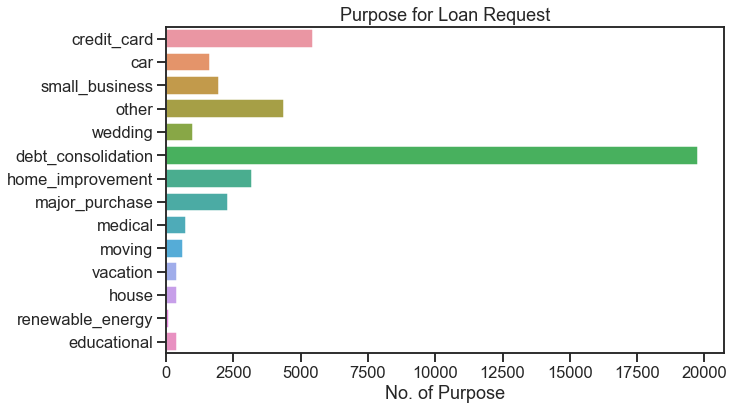

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(y='purpose', data=loan_df)
plt.title("Purpose for Loan Request")
plt.xlabel('No. of Purpose')
plt.ylabel('')
plt.show()

# Loan Status

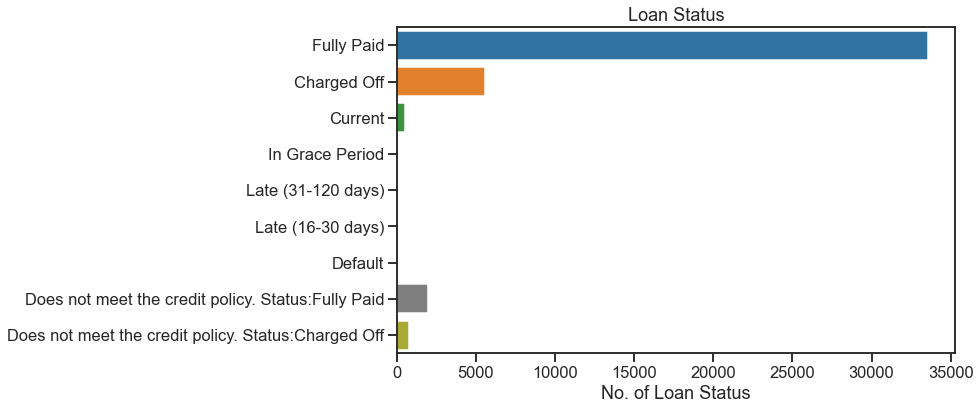

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(y='loan_status', data=loan_df)
plt.title("Loan Status")
plt.xlabel('No. of Loan Status')
plt.ylabel('')
plt.show()

# Verification Status

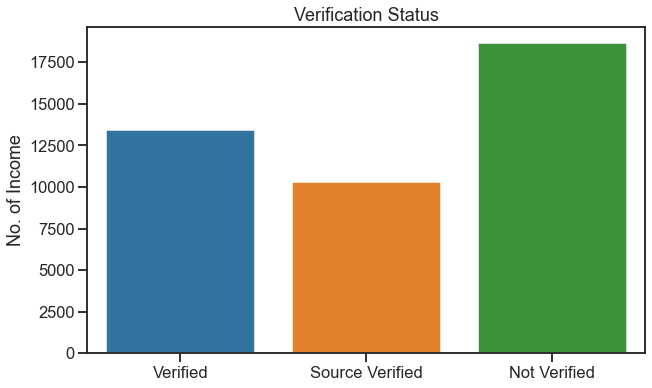

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(x='verification_status', data=loan_df)
plt.title("Verification Status")
plt.xlabel('')
plt.ylabel('No. of Income')
plt.show()

# Employment Length in Years

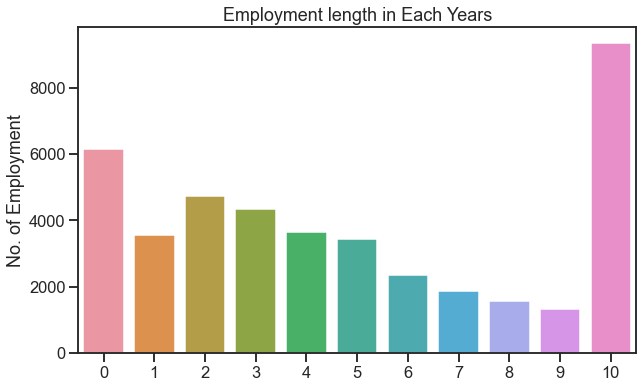

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length_year', data=loan_df)
plt.title("Employment length in Each Years")
plt.xlabel('')
plt.ylabel('No. of Employment')
plt.show()

# LC Assigned Loan Grade

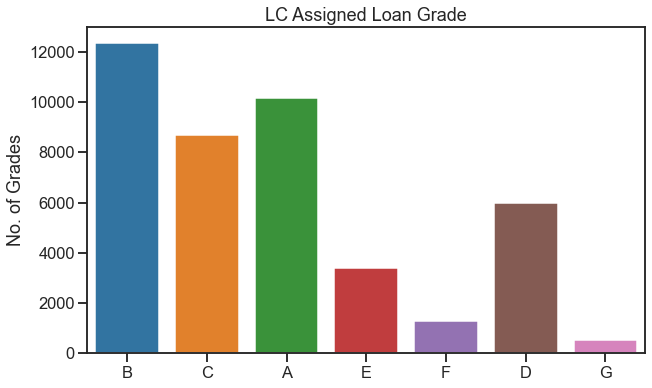

In [98]:
plt.figure(figsize=(10,6))
sns.set_context('talk')
sns.set_style('ticks')
sns.countplot(x='grade', data=loan_df)
plt.title("LC Assigned Loan Grade")
plt.xlabel('')
plt.ylabel('No. of Grades')
plt.show()

# Home Ownership

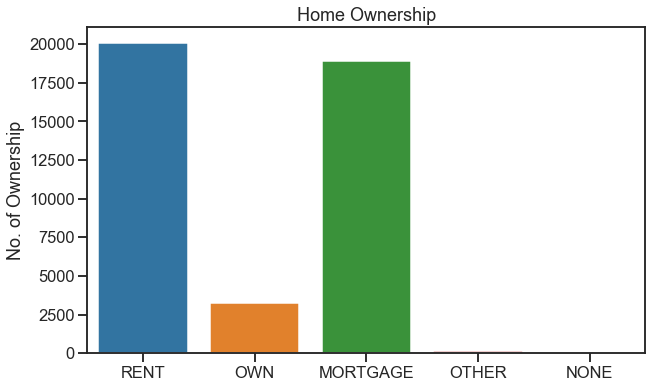

In [99]:
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership', data=loan_df)
plt.title("Home Ownership")
plt.xlabel('')
plt.ylabel('No. of Ownership')
plt.show()

# Payment Term Months

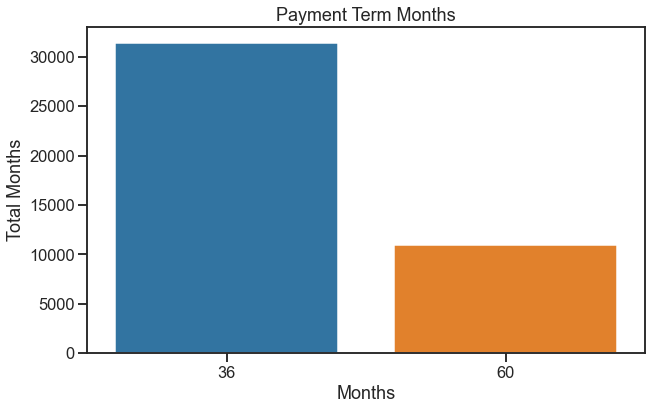

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(x='term_months', data=loan_df)
plt.title("Payment Term Months")
plt.xlabel('Months')
plt.ylabel('Total Months')
plt.show()

# Annual Income

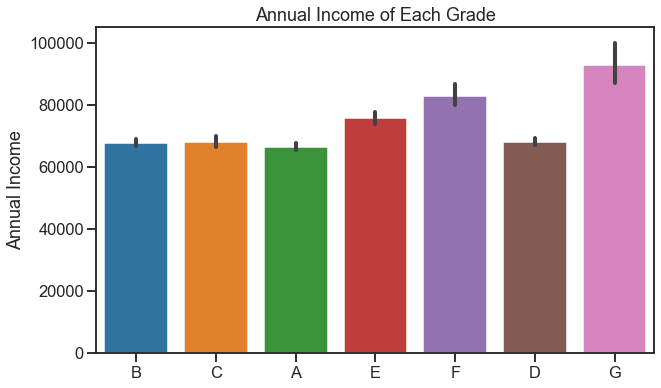

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='annual_inc', data=loan_df)
plt.title('Annual Income of Each Grade')
plt.xlabel('')
plt.ylabel('Annual Income')
plt.show()

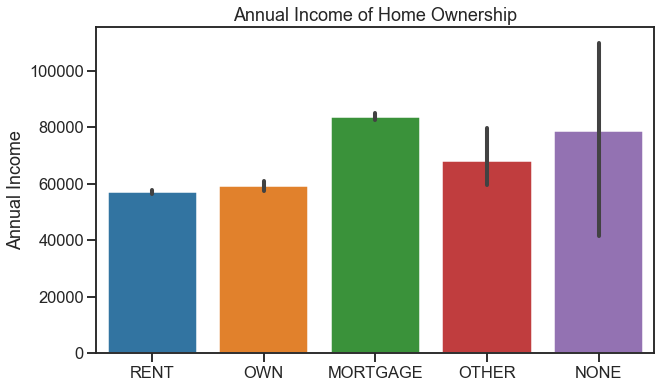

In [101]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='annual_inc', data=loan_df)
plt.title('Annual Income of Home Ownership')
plt.xlabel('')
plt.ylabel('Annual Income')
plt.show()

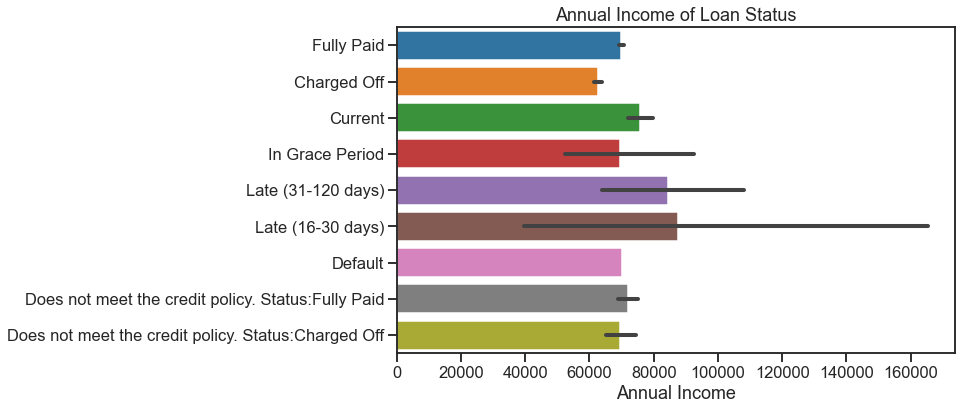

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(y='loan_status', x='annual_inc', data=loan_df)
plt.title('Annual Income of Loan Status')
plt.ylabel('')
plt.xlabel('Annual Income')
plt.show()

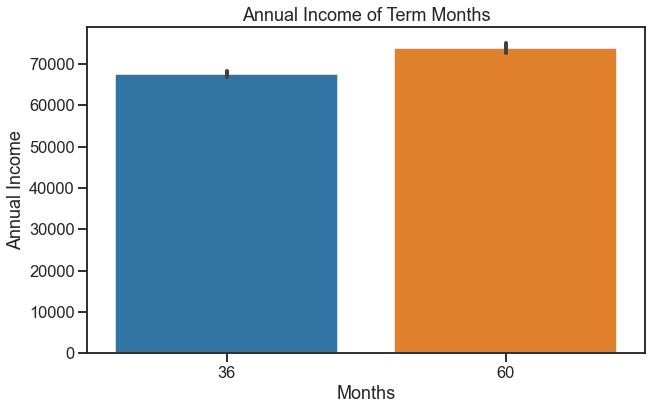

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(x='term_months', y='annual_inc', data=loan_df)
plt.title('Annual Income of Term Months')
plt.xlabel('Months')
plt.ylabel('Annual Income')
plt.show()

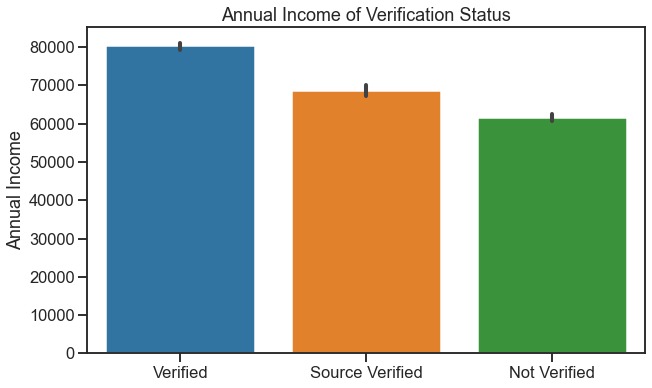

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(x='verification_status', y='annual_inc', data=loan_df)
plt.title('Annual Income of Verification Status')
plt.xlabel('')
plt.ylabel('Annual Income')
plt.show()

# Loan Amount

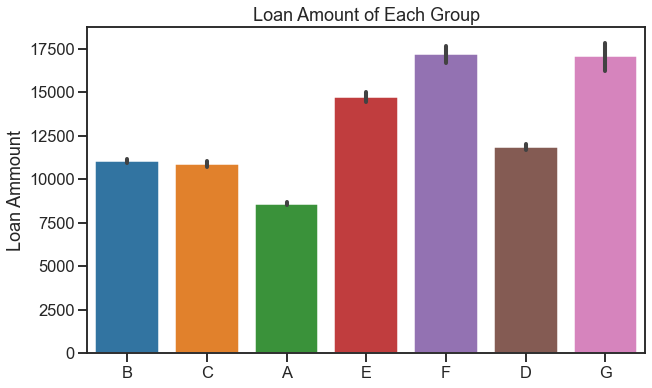

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='loan_amnt', data=loan_df)
plt.title('Loan Amount of Each Group')
plt.xlabel('')
plt.ylabel('Loan Ammount')
plt.show()

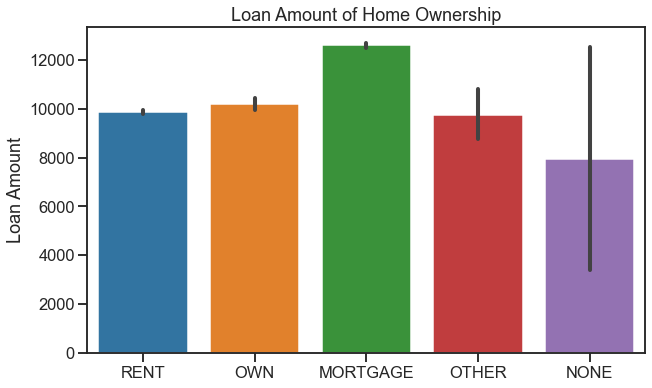

In [106]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='loan_amnt', data=loan_df)
plt.title('Loan Amount of Home Ownership')
plt.xlabel('')
plt.ylabel('Loan Amount')
plt.show()

# Installment

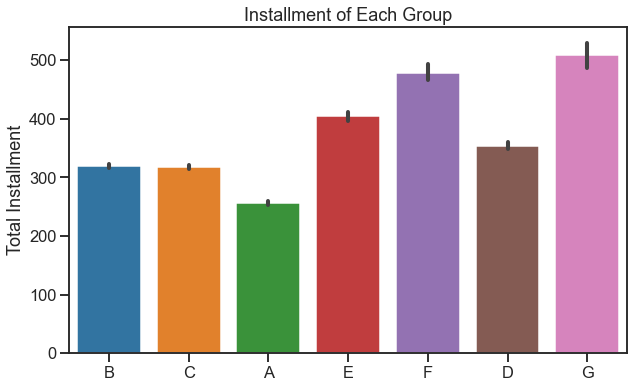

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='installment', data=loan_df)
plt.title('Installment of Each Group')
plt.xlabel('')
plt.ylabel('Total Installment')
plt.show()

# Interest Rate

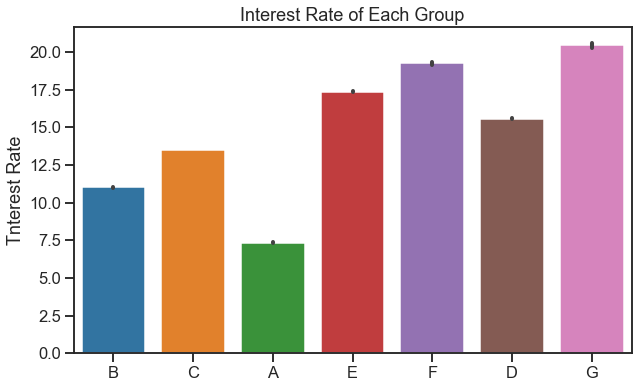

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='int_rate_%', data=loan_df)
plt.title('Interest Rate of Each Group')
plt.xlabel('')
plt.ylabel('Tnterest Rate')
plt.show()

# 'dti' Ration

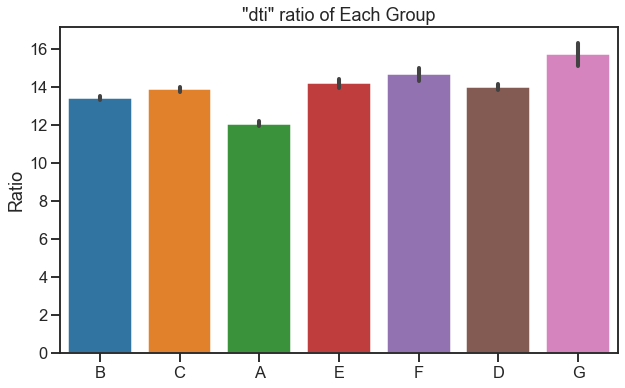

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='dti', data=loan_df)
plt.title('"dti" ratio of Each Group')
plt.xlabel('')
plt.ylabel('Ratio')
plt.show()

# Open Credit Lines

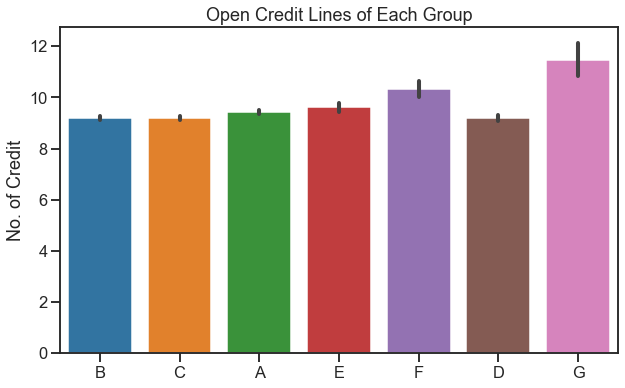

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='open_acc', data=loan_df)
plt.title('Open Credit Lines of Each Group')
plt.xlabel('')
plt.ylabel('No. of Credit')
plt.show()

# Credit Revolving Balance

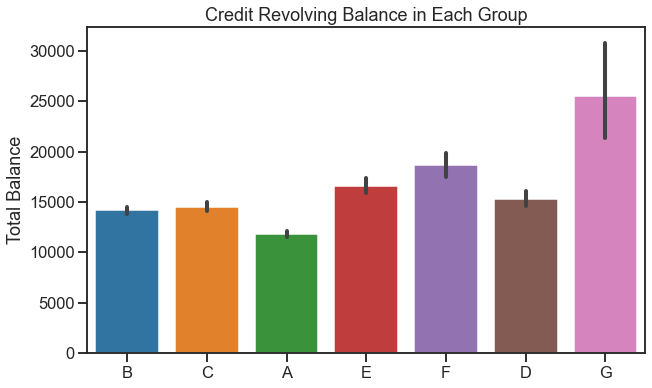

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='revol_bal', data=loan_df)
plt.title('Credit Revolving Balance in Each Group')
plt.xlabel('')
plt.ylabel('Total Balance')
plt.show()

# Funded Amount Payments Received

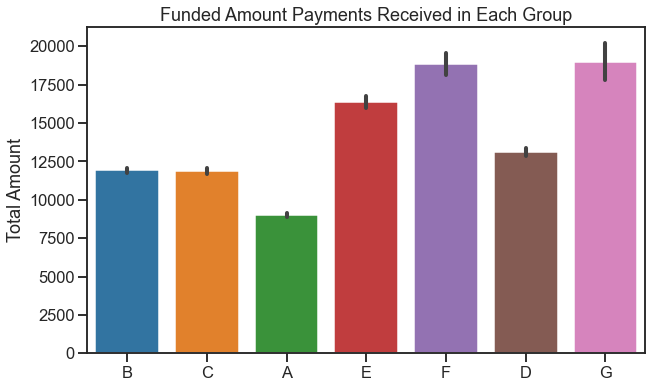

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='total_pymnt', data=loan_df)
plt.title('Funded Amount Payments Received in Each Group')
plt.xlabel('')
plt.ylabel('Total Amount')
plt.show()

# Principal Amount Received

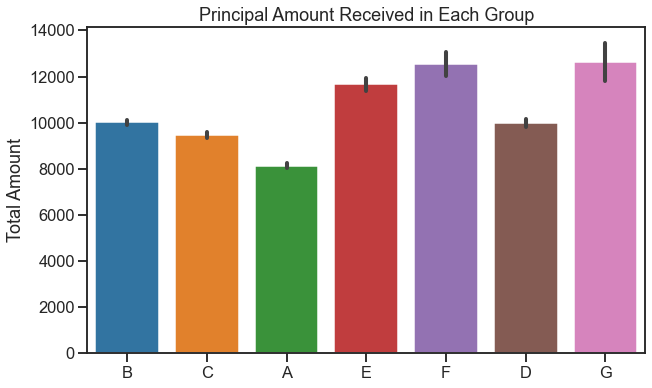

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='total_rec_prncp', data=loan_df)
plt.title('Principal Amount Received in Each Group')
plt.xlabel('')
plt.ylabel('Total Amount')
plt.show()

# Post Charge off Gross Recovery

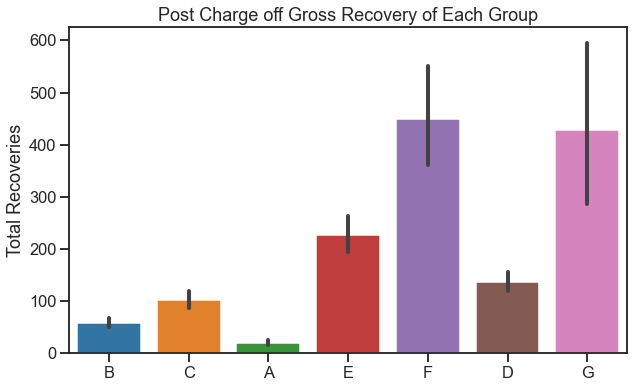

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='recoveries', data=loan_df)
plt.title('Post Charge off Gross Recovery of Each Group')
plt.xlabel('')
plt.ylabel('Total Recoveries')
plt.show()

# Last Payment Amount Received

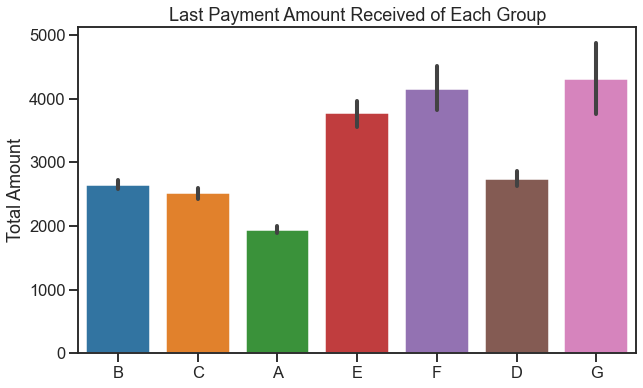

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='last_pymnt_amnt', data=loan_df)
plt.title('Last Payment Amount Received of Each Group')
plt.xlabel('')
plt.ylabel('Total Amount')
plt.show()

<AxesSubplot:xlabel='total_pymnt_inv', ylabel='total_pymnt'>

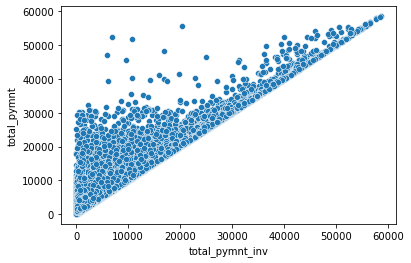

In [23]:
sns.scatterplot(x='total_pymnt_inv', y='total_pymnt', data=loan_df)

<AxesSubplot:xlabel='total_pymnt', ylabel='total_rec_prncp'>

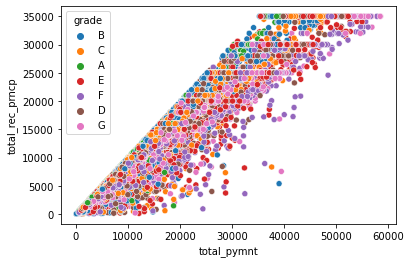

In [25]:
sns.scatterplot(x='total_pymnt', y='total_rec_prncp', data=loan_df, hue='grade')

<AxesSubplot:xlabel='total_pymnt', ylabel='total_rec_int'>

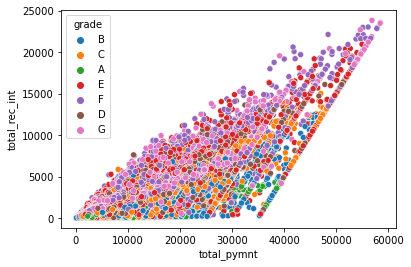

In [26]:
sns.scatterplot(x='total_pymnt', y='total_rec_int', data=loan_df, hue='grade')

<AxesSubplot:xlabel='total_pymnt', ylabel='total_rec_late_fee'>

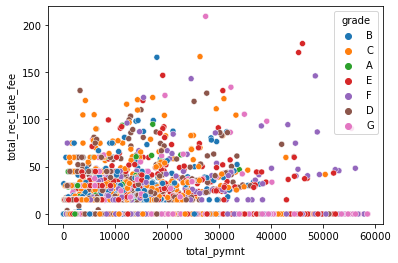

In [27]:
sns.scatterplot(x='total_pymnt', y='total_rec_late_fee', data=loan_df, hue='grade')

<AxesSubplot:xlabel='recoveries', ylabel='collection_recovery_fee'>

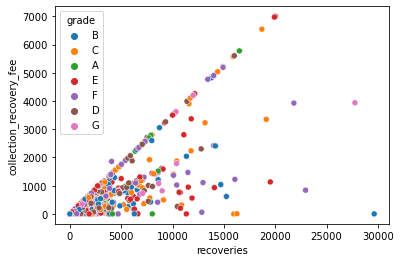

In [30]:
sns.scatterplot(x='recoveries', y='collection_recovery_fee', data=loan_df, hue='grade')

<AxesSubplot:xlabel='total_pymnt', ylabel='last_pymnt_amnt'>

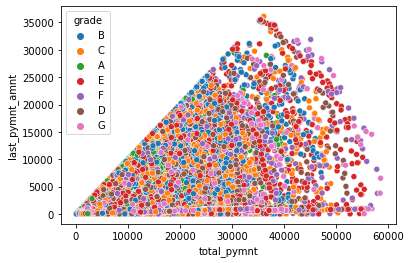

In [32]:
sns.scatterplot(x='total_pymnt', y='last_pymnt_amnt', data=loan_df, hue='grade')

<AxesSubplot:xlabel='total_pymnt', ylabel='last_pymnt_amnt'>

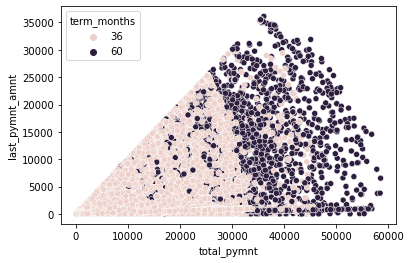

In [33]:
sns.scatterplot(x='total_pymnt', y='last_pymnt_amnt', data=loan_df, hue='term_months')

<AxesSubplot:xlabel='total_pymnt', ylabel='last_pymnt_amnt'>

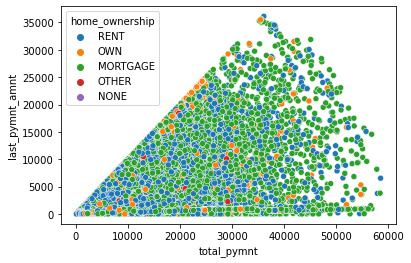

In [34]:
sns.scatterplot(x='total_pymnt', y='last_pymnt_amnt', data=loan_df, hue='home_ownership')

In [36]:
num_cols = []
for cols in loan_df:
    num_cols.append(cols)

In [38]:
len(num_cols)

58

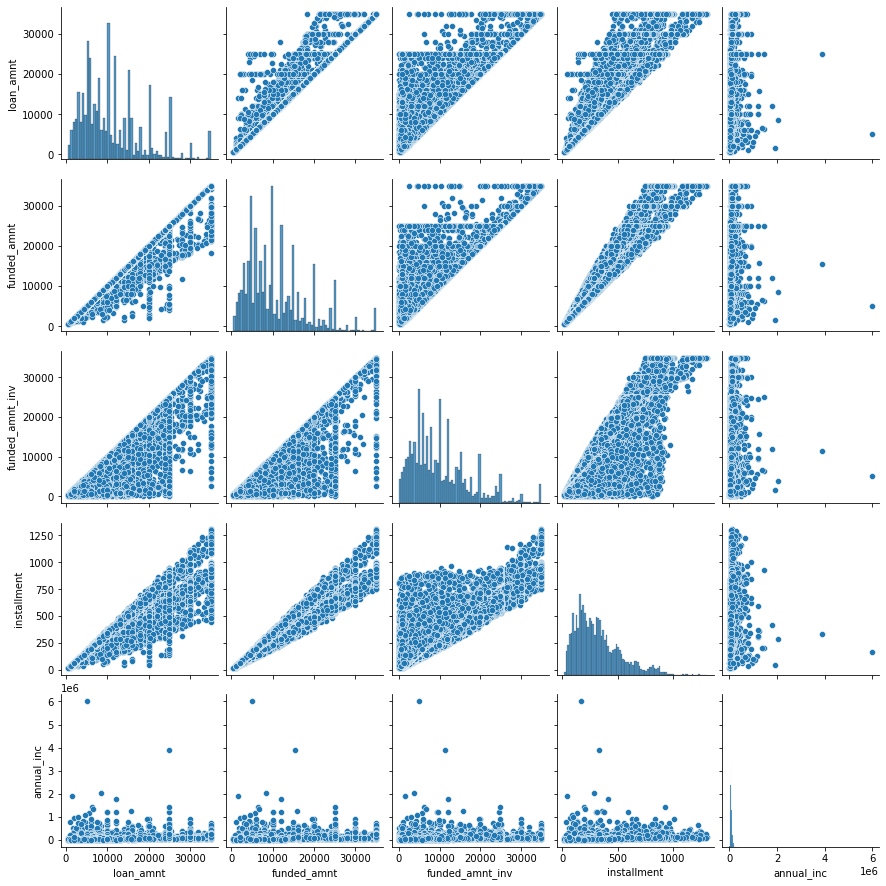

In [42]:
sns.pairplot(loan_df[num_cols[2:17]])

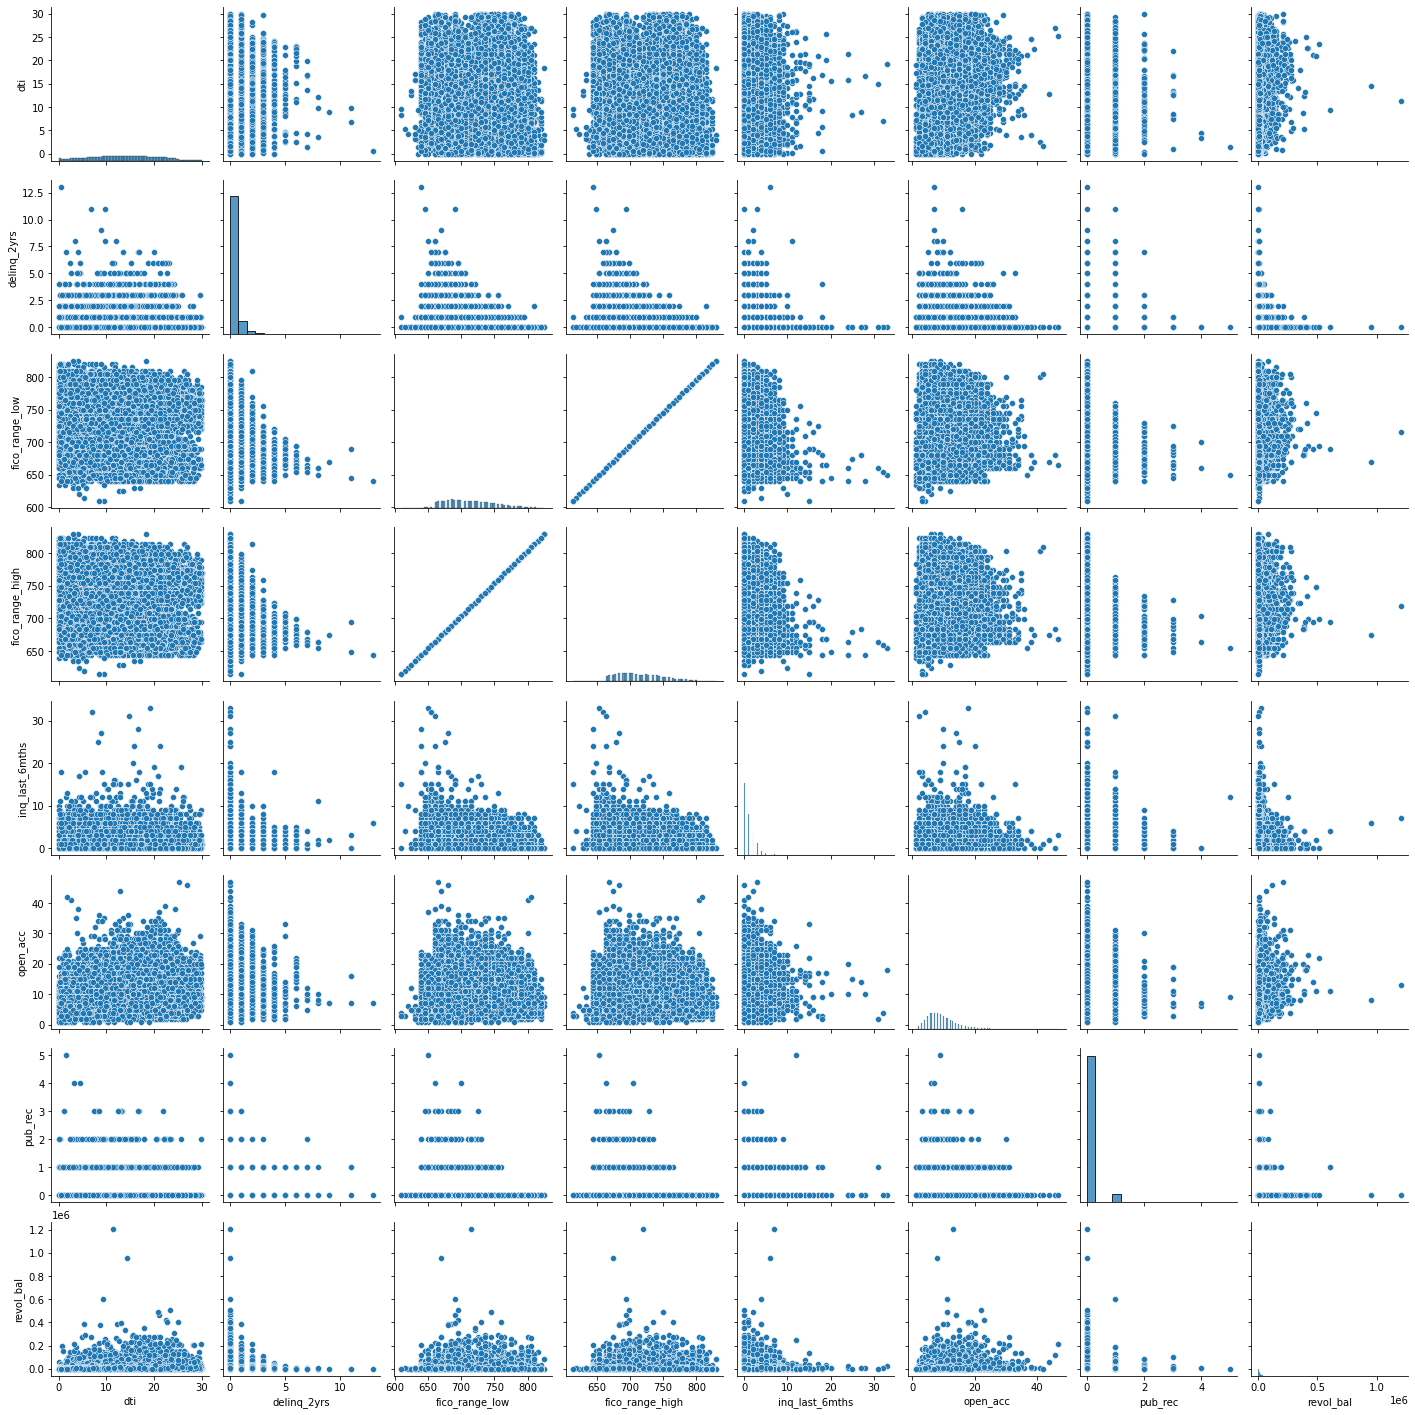

In [41]:
sns.pairplot(loan_df[num_cols[17:30]])

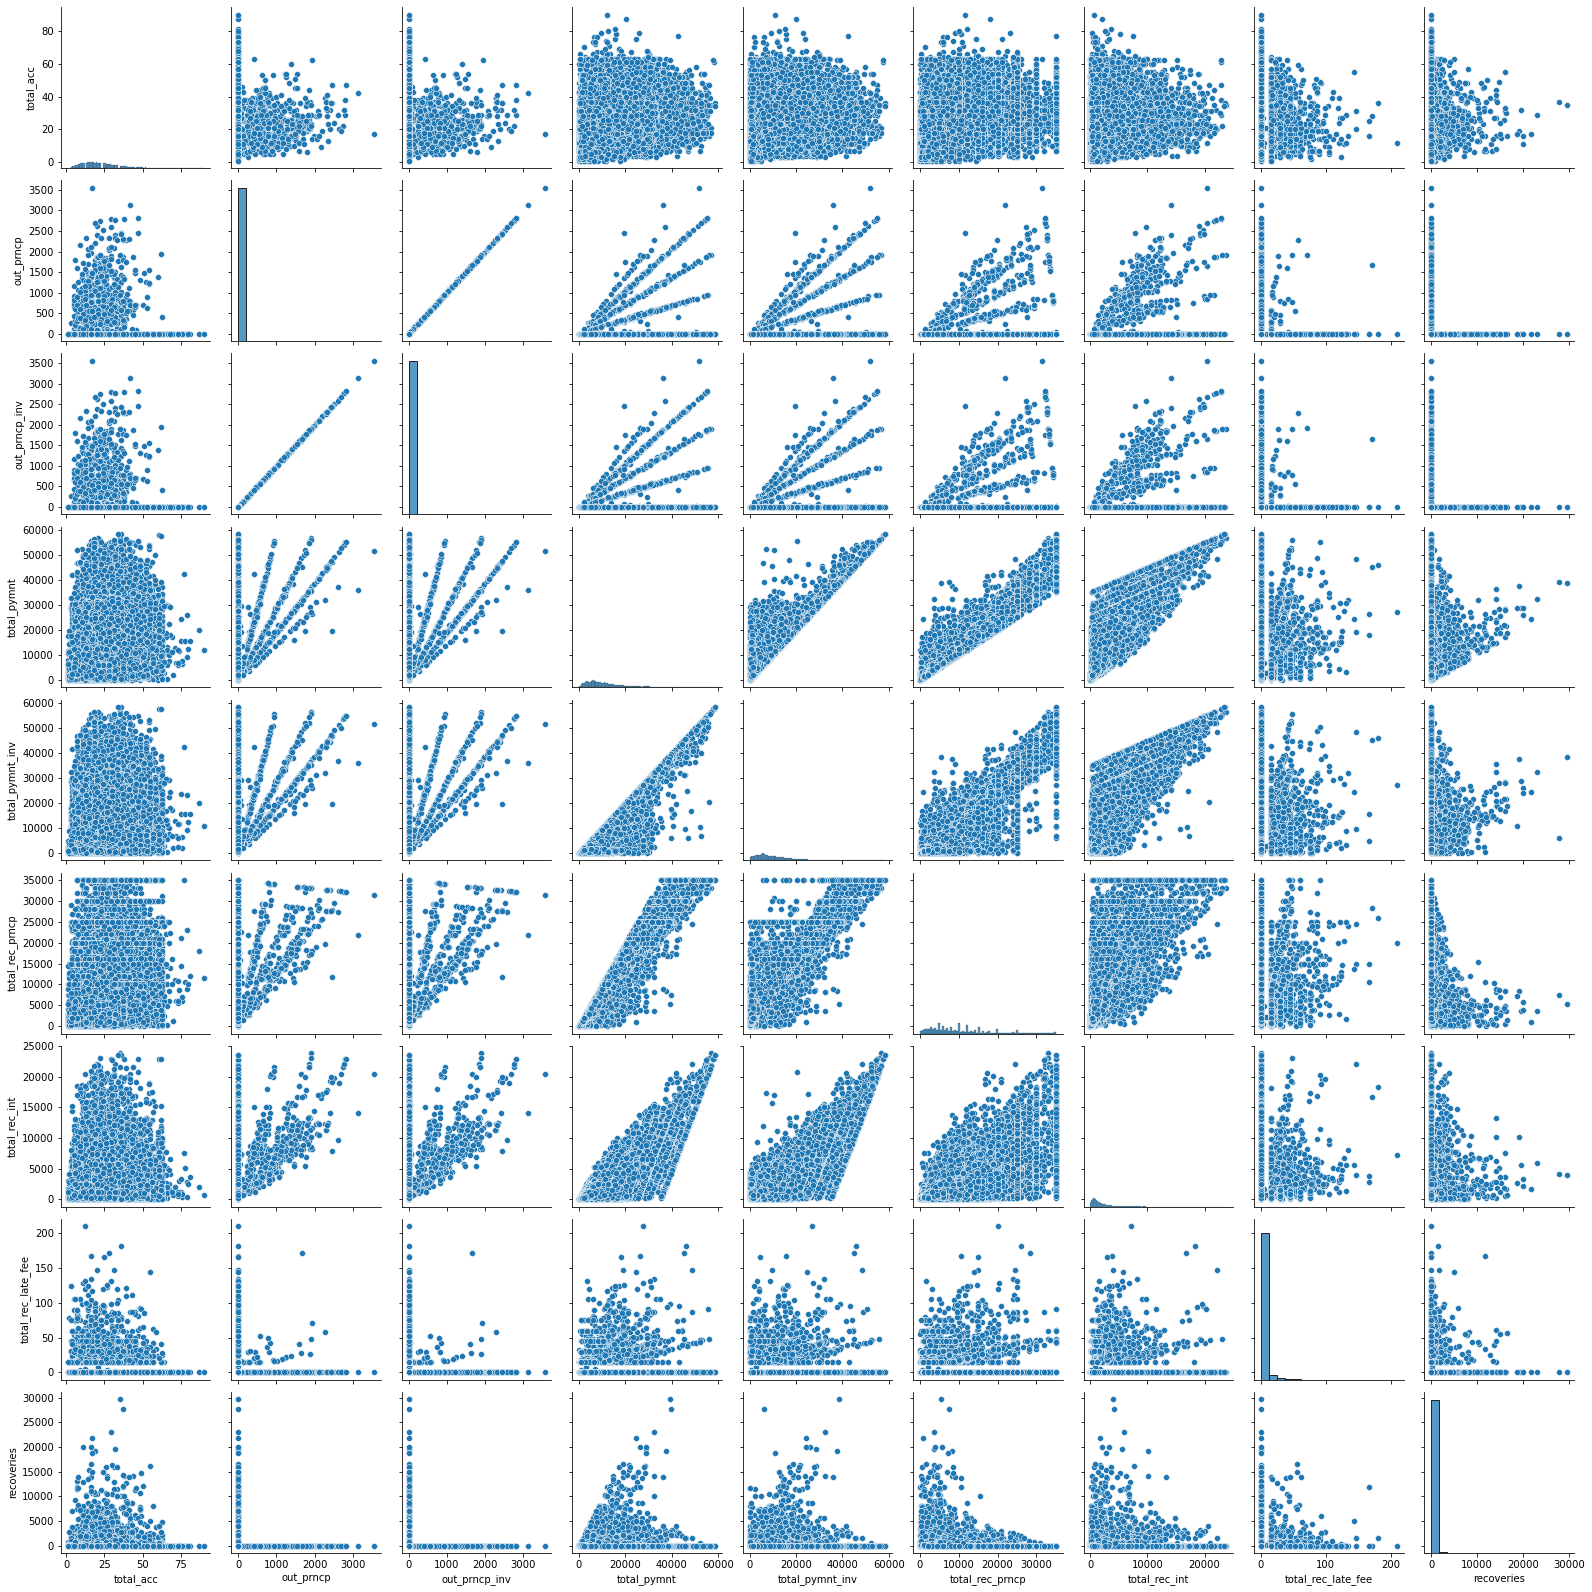

In [69]:
sns.pairplot(loan_df[num_cols[30:40]])

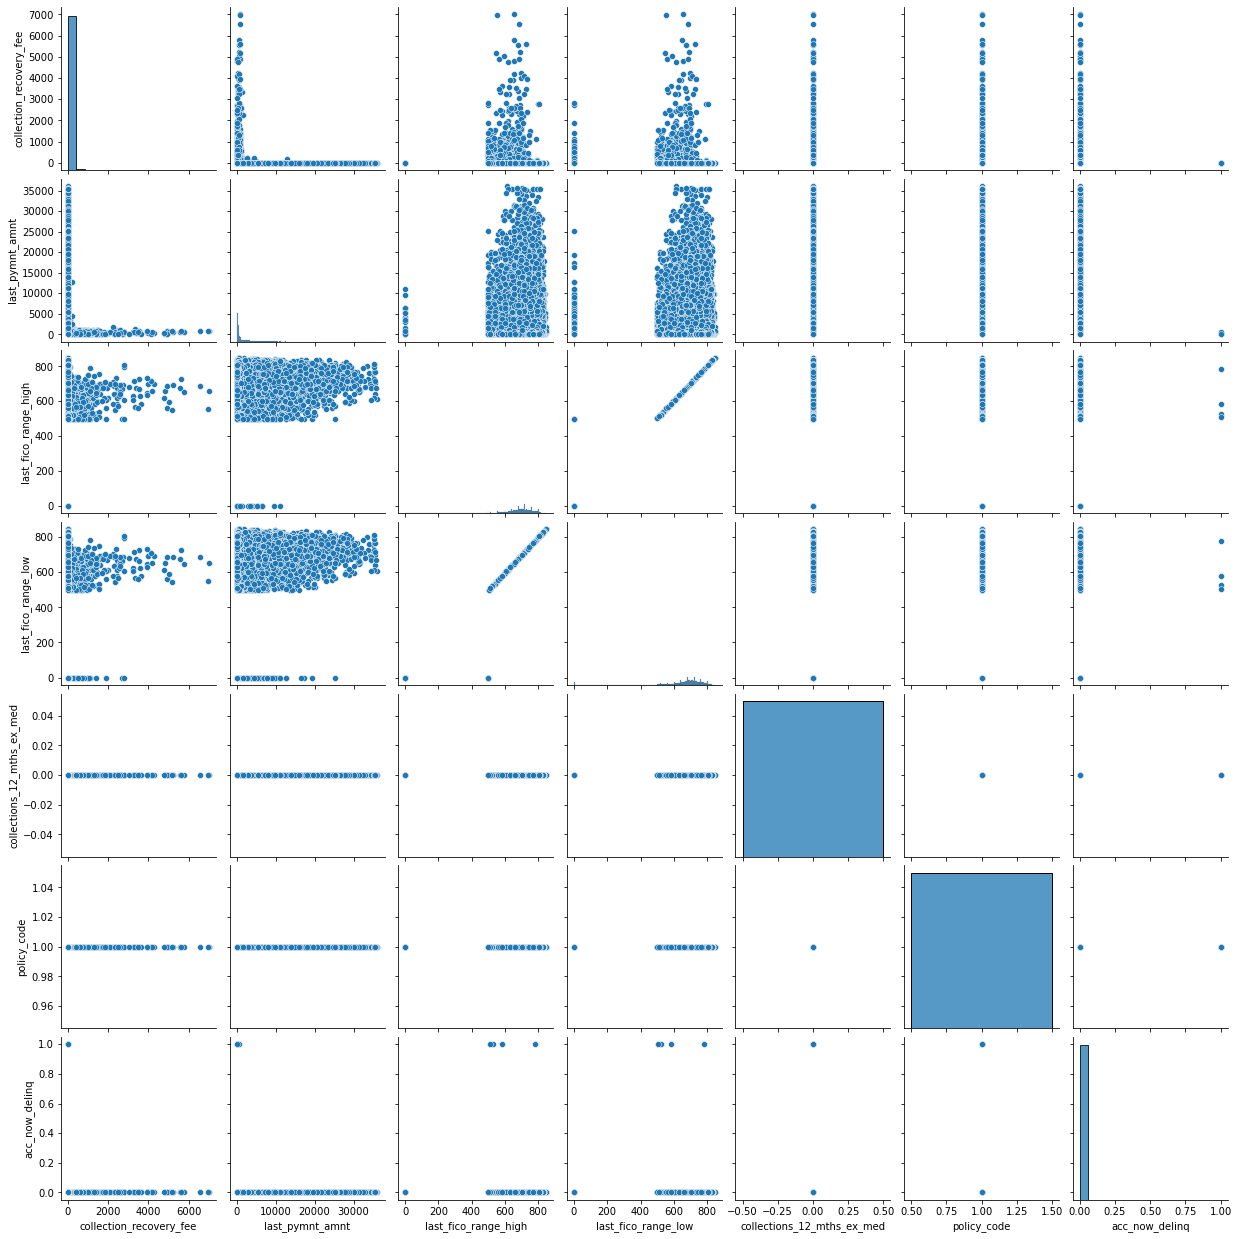

In [70]:
sns.pairplot(loan_df[num_cols[40:50]])

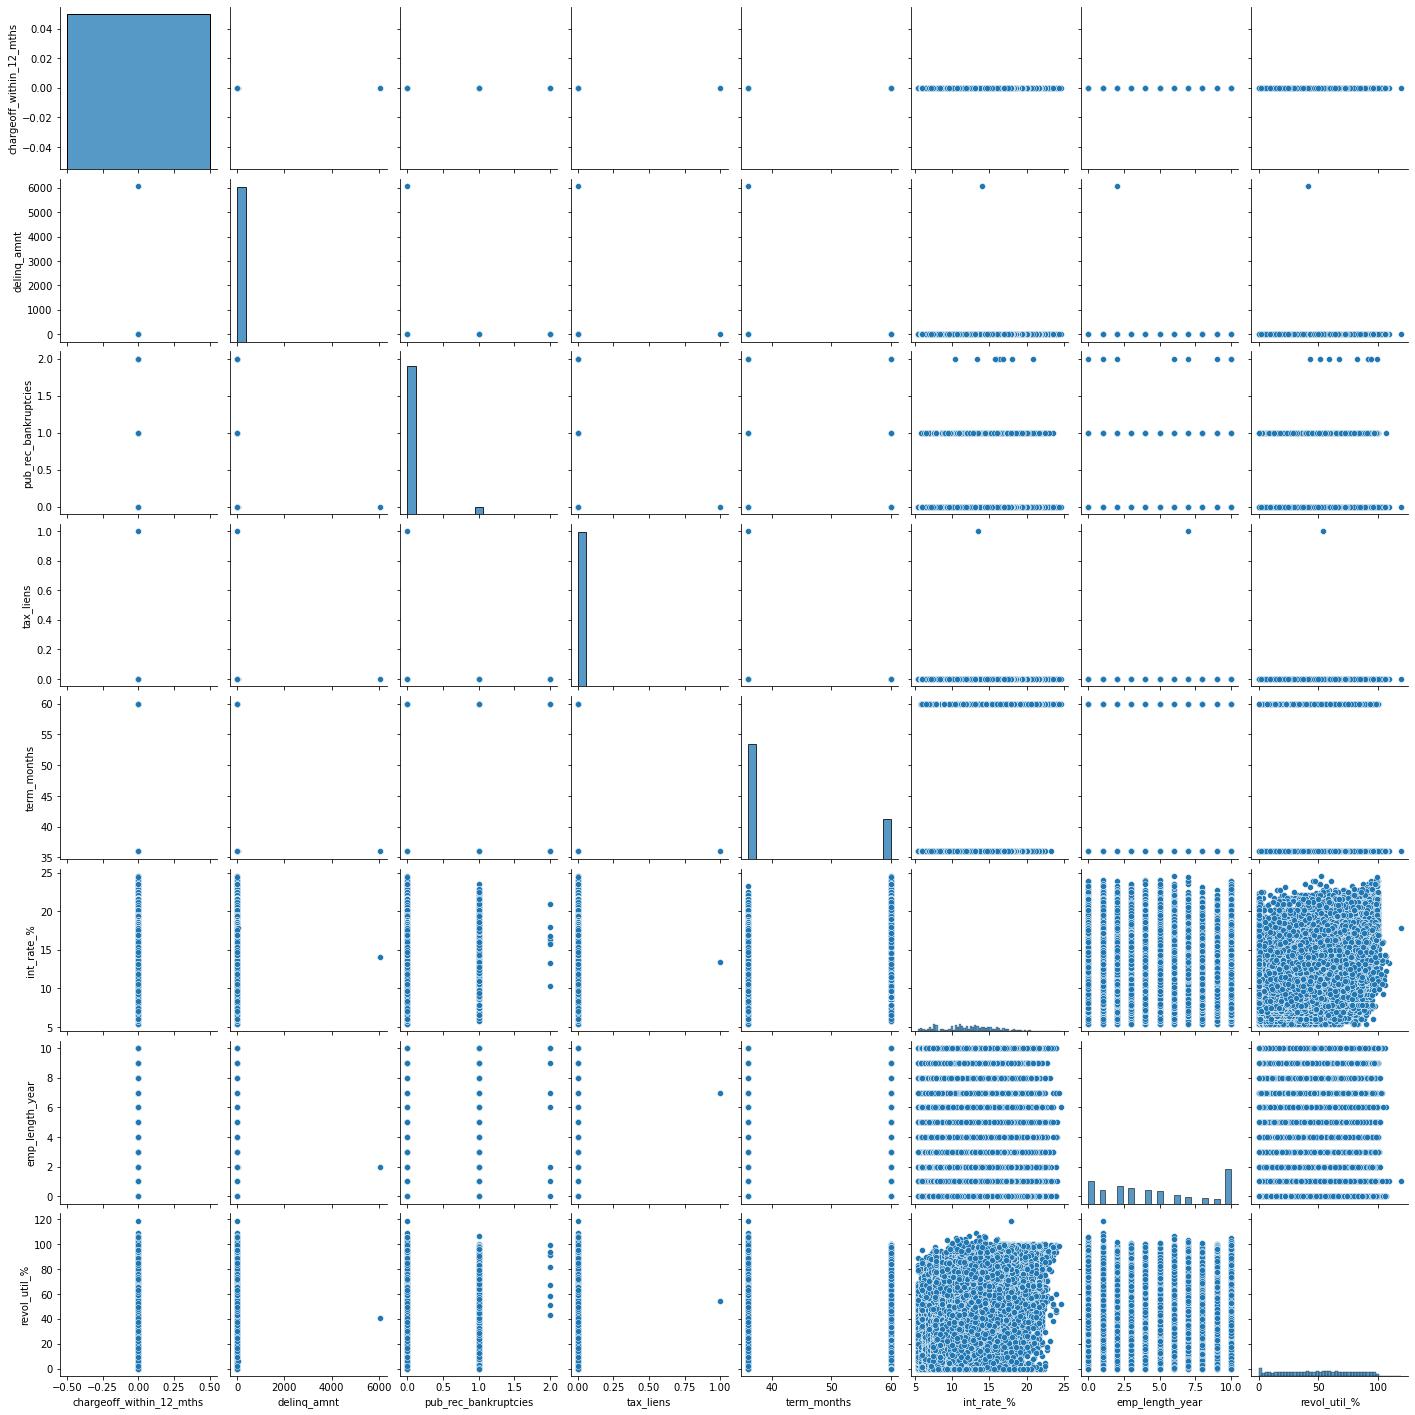

In [71]:
sns.pairplot(loan_df[num_cols[50:]])

<AxesSubplot:xlabel='dti', ylabel='Count'>

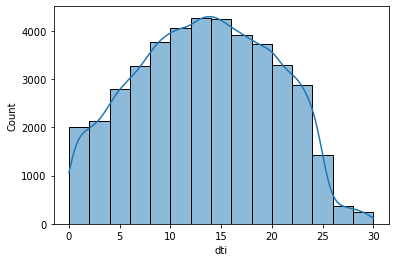

In [68]:
sns.histplot(x='dti', data=loan_df, bins=15, kde=True)

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

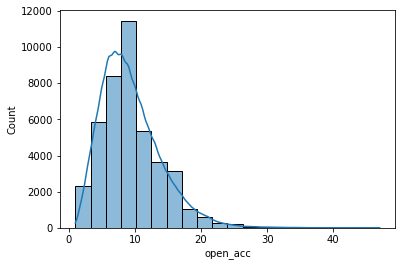

In [56]:
sns.histplot(x='open_acc', data=loan_df, bins=20, kde=True)

<AxesSubplot:xlabel='fico_range_low', ylabel='Count'>

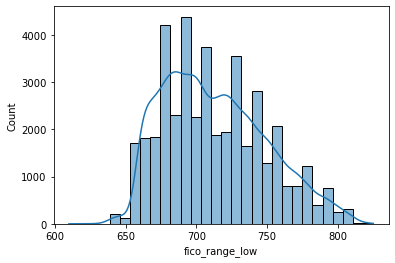

In [62]:
sns.histplot(x='fico_range_low', data=loan_df, bins=30, kde=True)

<AxesSubplot:xlabel='fico_range_high', ylabel='Count'>

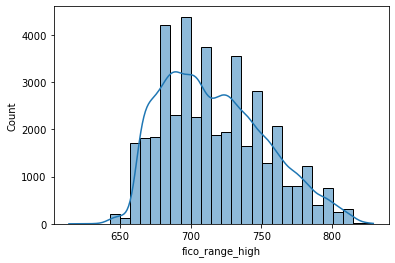

In [63]:
sns.histplot(x='fico_range_high', data=loan_df, bins=30, kde=True)

In [67]:
month_year_cols = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [68]:
for cols in month_year_cols:
    loan_df[cols] = pd.to_datetime(loan_df[cols])

In [69]:
loan_df[month_year_cols]

issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0     2011-12-01       1985-01-01   2015-01-01         2016-09-01
1     2011-12-01       1999-04-01   2013-04-01         2016-09-01
2     2011-12-01       2001-11-01   2014-06-01         2016-09-01
3     2011-12-01       1996-02-01   2015-01-01         2016-04-01
4     2011-12-01       1996-01-01   2016-09-01         2016-09-01
...          ...              ...          ...                ...
42415 2007-07-01       2006-12-01   2010-02-01         2013-07-01
42416 2007-07-01       1999-09-01   2010-08-01         2010-08-01
42417 2007-07-01       1984-03-01   2010-07-01         2010-06-01
42418 2007-06-01       1996-01-01   2010-06-01         2014-10-01
42419 2007-06-01       2004-07-01   2010-06-01         2015-02-01

[42420 rows x 4 columns]

<AxesSubplot:xlabel='issue_d', ylabel='last_pymnt_d'>

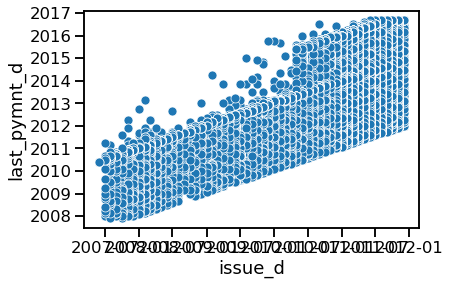

In [70]:
sns.scatterplot(loan_df['issue_d'], loan_df['last_pymnt_d'])

<AxesSubplot:xlabel='issue_d', ylabel='last_credit_pull_d'>

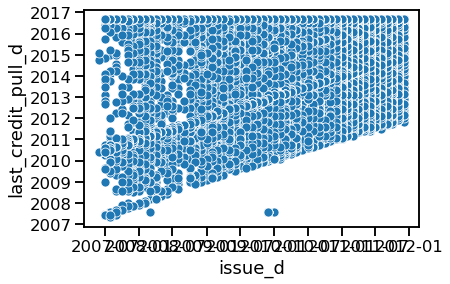

In [71]:
sns.scatterplot(loan_df['issue_d'], loan_df['last_credit_pull_d'])

<AxesSubplot:xlabel='issue_d', ylabel='earliest_cr_line'>

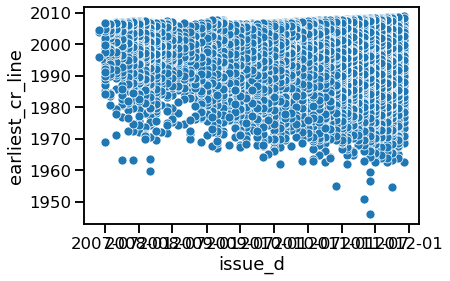

In [72]:
sns.scatterplot(loan_df['issue_d'], loan_df['earliest_cr_line'])

<AxesSubplot:xlabel='last_pymnt_d', ylabel='last_credit_pull_d'>

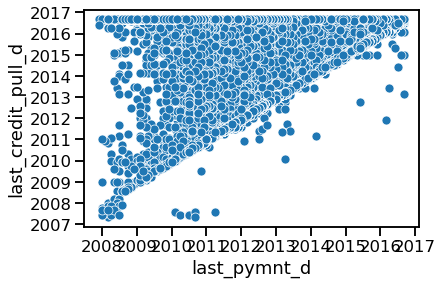

In [73]:
sns.scatterplot(loan_df['last_pymnt_d'], loan_df['last_credit_pull_d'])

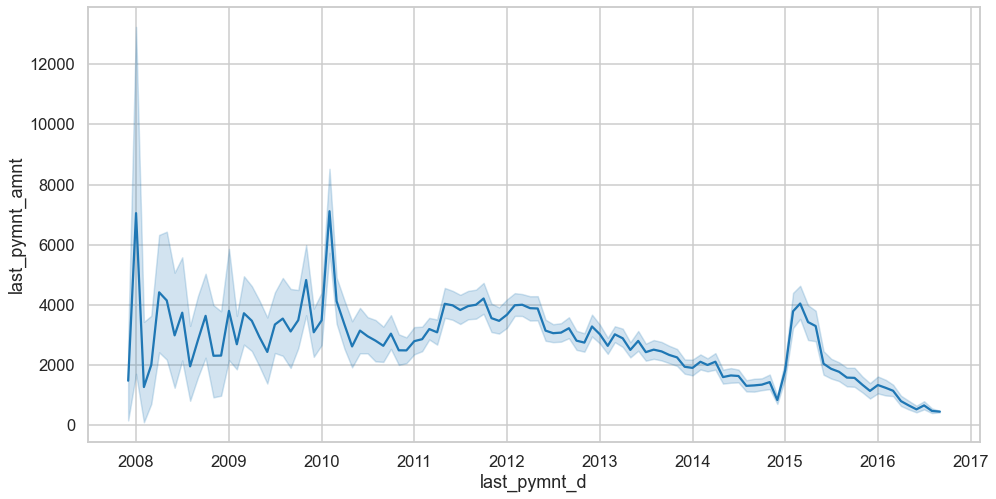

In [112]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.lineplot(x='last_pymnt_d', y='last_pymnt_amnt', data=loan_df)
plt.show()

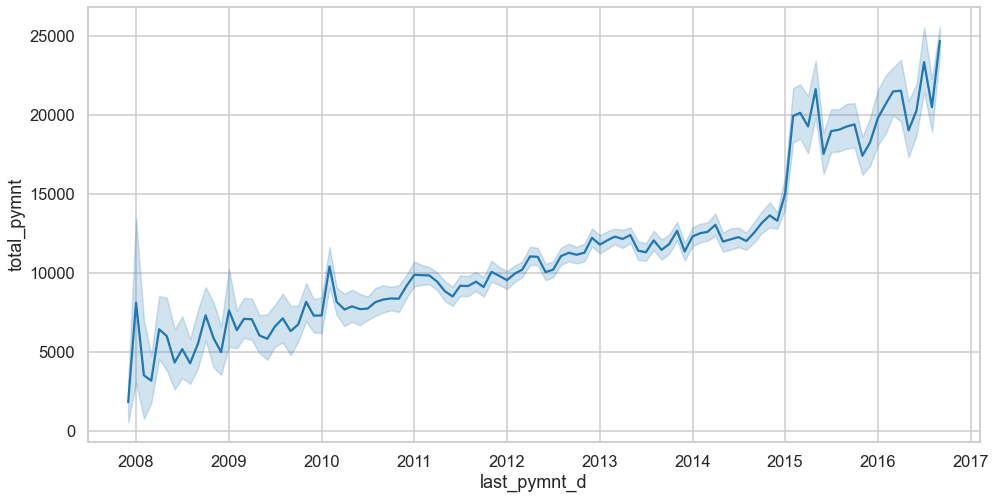

In [106]:
plt.figure(figsize=(16,8))
sns.lineplot(x='last_pymnt_d', y='total_pymnt', data=loan_df)
plt.show()

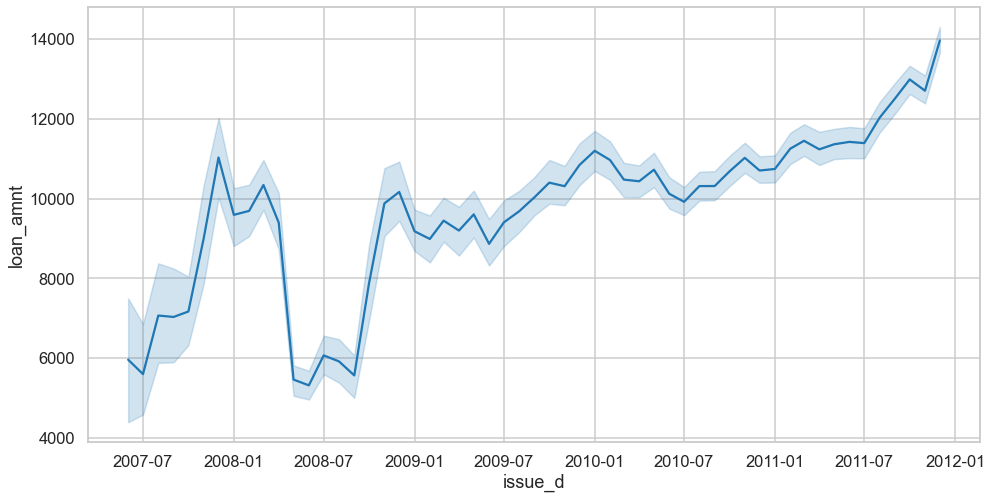

In [107]:
plt.figure(figsize=(16,8))
sns.lineplot(x='issue_d', y='loan_amnt', data=loan_df)
plt.show()